In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix  

from sklearn import metrics

In [45]:
df=pd.read_csv('Crop_recommendation.csv')

In [46]:
df.head()

N   P   K  temperature        ph    rainfall label    soiltype
0  90  42  43    20.879744  6.502985  202.935536  rice  clay soil.
1  85  58  41    21.770462  7.038096  226.655537  rice  clay soil.
2  60  55  44    23.004459  7.840207  263.964248  rice  clay soil.
3  74  35  40    26.491096  6.980401  242.864034  rice  clay soil.
4  78  42  42    20.130175  7.628473  262.717340  rice  clay soil.

In [47]:
df.shape

(2200, 8)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   ph           2200 non-null   float64
 5   rainfall     2200 non-null   float64
 6   label        2200 non-null   object 
 7   soiltype     2200 non-null   object 
dtypes: float64(3), int64(3), object(2)
memory usage: 137.6+ KB


In [49]:
df.describe()

N            P            K  temperature           ph  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244     6.469480   
std      36.917334    32.985883    50.647931     5.063749     0.773938   
min       0.000000     5.000000     5.000000     8.825675     3.504752   
25%      21.000000    28.000000    20.000000    22.769375     5.971693   
50%      37.000000    51.000000    32.000000    25.598693     6.425045   
75%      84.250000    68.000000    49.000000    28.561654     6.923643   
max     140.000000   145.000000   205.000000    43.675493     9.935091   

          rainfall  
count  2200.000000  
mean    103.463655  
std      54.958389  
min      20.211267  
25%      64.551686  
50%      94.867624  
75%     124.267508  
max     298.560117

In [50]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
ph             0
rainfall       0
label          0
soiltype       0
dtype: int64

In [51]:
df.duplicated(keep='first').sum()

0

In [52]:
df=df.drop_duplicates()

In [53]:
df.duplicated(keep='first').sum()

0

<AxesSubplot:>

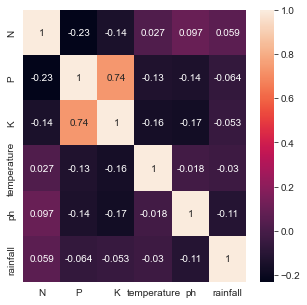

In [54]:
corr_map=df.corr()
sns.set_style('darkgrid') 
# sns.set_style help to set color of the axes, whether a grid is enabled by default, and other aesthetic elements.
plt.figure(figsize=(5,5))
sns.heatmap(data=corr_map, annot=True)

In [55]:
label_encoder = preprocessing.LabelEncoder()
ids = label_encoder.fit_transform(df['label'])
crop_mapping = dict(zip(range(len(label_encoder.classes_)),label_encoder.classes_))
print(crop_mapping)

df['label']= label_encoder.fit_transform(df['label'])

{0: 'apple', 1: 'banana', 2: 'blackgram', 3: 'chickpea', 4: 'coconut', 5: 'coffee', 6: 'cotton', 7: 'grapes', 8: 'jute', 9: 'kidneybeans', 10: 'lentil', 11: 'maize', 12: 'mango', 13: 'mothbeans', 14: 'mungbean', 15: 'muskmelon', 16: 'orange', 17: 'papaya', 18: 'pigeonpeas', 19: 'pomegranate', 20: 'rice', 21: 'watermelon'}


In [56]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'ph', 'rainfall', 'label', 'soiltype'], dtype='object')

In [57]:
label_encoder = preprocessing.LabelEncoder()
ids = label_encoder.fit_transform(df['soiltype'])
soil_mapping = dict(zip(range(len(label_encoder.classes_)),label_encoder.classes_))
print(soil_mapping)

df['soiltype']= label_encoder.fit_transform(df['soiltype'])

{0: 'Alluvial Soil', 1: 'Black soil', 2: 'Chalky Soil (Alkaline Soil)', 3: 'Clay', 4: 'Clay Loam Soil', 5: 'Loamy', 6: 'Loamy Soil', 7: 'Marly', 8: 'Marly Soil', 9: 'Peaty Soil', 10: 'Saline Soil', 11: 'Sandy Loam Soil', 12: 'Silty', 13: 'Silty Soil', 14: 'alluvial soil', 15: 'clay soil.', 16: 'loamy soil'}


In [58]:
df,df.shape

(        N   P   K  temperature        ph    rainfall  label  soiltype
 0      90  42  43    20.879744  6.502985  202.935536     20        15
 1      85  58  41    21.770462  7.038096  226.655537     20        15
 2      60  55  44    23.004459  7.840207  263.964248     20        15
 3      74  35  40    26.491096  6.980401  242.864034     20        15
 4      78  42  42    20.130175  7.628473  262.717340     20        15
 ...   ...  ..  ..          ...       ...         ...    ...       ...
 2195  107  34  32    26.774637  6.780064  177.774507      5        13
 2196   99  15  27    27.417112  6.086922  127.924610      5        13
 2197  118  33  30    24.131797  6.362608  173.322839      5        13
 2198  117  32  34    26.272418  6.758793  127.175293      5        13
 2199  104  18  30    23.603016  6.779833  140.937041      5        13
 
 [2200 rows x 8 columns],
 (2200, 8))

In [59]:
X=df.drop(labels=['label'], axis=1)
y=df['label'].values

In [60]:
X

N   P   K  temperature        ph    rainfall  soiltype
0      90  42  43    20.879744  6.502985  202.935536        15
1      85  58  41    21.770462  7.038096  226.655537        15
2      60  55  44    23.004459  7.840207  263.964248        15
3      74  35  40    26.491096  6.980401  242.864034        15
4      78  42  42    20.130175  7.628473  262.717340        15
...   ...  ..  ..          ...       ...         ...       ...
2195  107  34  32    26.774637  6.780064  177.774507        13
2196   99  15  27    27.417112  6.086922  127.924610        13
2197  118  33  30    24.131797  6.362608  173.322839        13
2198  117  32  34    26.272418  6.758793  127.175293        13
2199  104  18  30    23.603016  6.779833  140.937041        13

[2200 rows x 7 columns]

In [61]:
y

array([20, 20, 20, ...,  5,  5,  5])

In [62]:
results=[]

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [64]:
X_train

N   P   K  temperature        ph    rainfall  soiltype
1863    1  12  30    27.754298  5.562224  131.090008         9
987    11  10  45    22.630452  6.397996  109.035760         4
375     5  74  21    16.244692  5.591704   66.970533        11
1071  105  88  54    25.787498  6.020445  114.200546         6
37     95  39  36    23.863305  5.561399  285.249365        16
...   ...  ..  ..          ...       ...         ...       ...
960     1  27  36    23.985988  5.684995  104.991282         4
905    31  25  38    24.962732  6.497367  109.416919         4
1096   92  81  52    28.010680  5.891414  103.704078         6
235    28  58  81    17.475010  6.180427   93.350343        11
1061   95  74  50    25.901131  6.002482  110.103230         6

[1760 rows x 7 columns]

In [65]:
y_train

array([ 4, 19,  9, ...,  1,  3,  1])

In [66]:
X_test

N    P    K  temperature        ph    rainfall  soiltype
1276   25  129  195    17.986678  5.777271   72.371277         2
1446  106   20   51    29.730197  6.342573   20.490356         5
335    33   59   22    22.642369  5.947000  122.388601        11
1458   89    9   47    29.471563  6.668383   28.752261         5
2038   62   49   37    24.217446  7.479248  166.136589         6
...   ...  ...  ...          ...       ...         ...       ...
1508   22  144  196    21.911913  6.499227  117.076128        12
1595   40  120  197    23.805938  5.889481  119.633555         8
1032  105   74   45    25.145176  6.098369  119.218154         6
1330  118   15   45    24.214957  6.538006   48.011385         7
1263   37  135  205    11.827682  5.510925   74.102251         2

[440 rows x 7 columns]

In [67]:
y_test

array([ 7, 15,  9, 15,  8, 21,  9, 16,  8, 18, 19, 20,  5, 12, 13,  1,  1,
        4,  1, 16, 10,  0, 19, 17, 15,  1,  7,  4,  6, 21, 11, 11, 15,  0,
       13,  6, 12,  2, 14, 16, 18,  7, 16, 17,  4, 19, 17,  5,  3,  8,  3,
       11, 10, 19,  5, 14, 21, 21,  6, 12,  2, 14, 19,  1,  5, 15,  3,  7,
        0,  8,  7, 12, 16, 11, 20, 21, 21, 11,  6, 12,  3,  1,  0, 16,  6,
        2,  6, 12, 13, 19,  8, 18,  7, 21, 14, 14,  9,  6,  7, 14,  1,  8,
       17, 13,  4, 17, 19,  1,  6, 11, 14,  0, 19,  3, 15, 10,  2, 12, 11,
        5,  2,  8, 15,  6,  9,  3,  9, 13, 21, 14, 20, 10, 16,  0,  9,  3,
        6,  4,  3, 14, 10,  2,  5, 18, 15, 19, 17, 10, 13, 21, 14,  4, 10,
       17, 12, 14, 11,  2,  6,  8, 20,  8,  7, 17, 21, 18, 14,  0, 13,  3,
       18,  4, 18, 10,  7, 20, 20, 20,  6,  7,  6,  7,  6, 15,  2, 19,  5,
       17,  7,  1, 21, 16,  1,  0, 15, 14, 10,  7,  8, 20,  4,  2, 15, 14,
       18, 20, 11, 10,  1, 19, 21,  8,  8,  9, 15, 11,  8, 10,  5,  5, 13,
        8,  9,  6, 11, 15

In [68]:
df['label'].value_counts()

21    100
19    100
2     100
4     100
6     100
8     100
10    100
12    100
14    100
16    100
18    100
20    100
1     100
3     100
5     100
7     100
9     100
11    100
13    100
15    100
17    100
0     100
Name: label, dtype: int64

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split

from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix  
from sklearn import metrics

In [70]:
rclf = RandomForestClassifier(n_estimators=100,n_jobs=-1)  
rclf.fit(X_train, y_train)
y_pred = rclf.predict(X_test)
accuracy=metrics.accuracy_score(y_test, y_pred)
results.append(accuracy)
print("Accuracy:",accuracy)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9931818181818182
[[22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 29  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 22  2  0  0  0  0  0  0  0]
 [ 0 

In [71]:
dt = DecisionTreeClassifier()  
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
accuracy=metrics.accuracy_score(y_test, y_pred)
results.append(accuracy)
print("Accuracy:",accuracy)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9795454545454545
[[22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 21  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 29  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 18  0  0  0  1  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0 20  3  0  0  0  0  0  0  0]
 [ 0 

In [72]:
knn = KNeighborsClassifier()  
knn .fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy=metrics.accuracy_score(y_test, y_pred)
results.append(accuracy)
print("Accuracy:",accuracy)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9295454545454546
[[22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 29  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0 16  0  0  0  1  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0  0  0  0  0 13  9  0  0  0  0  0  0  0]
 [ 0 

In [73]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
accuracy=metrics.accuracy_score(y_test, y_pred)
results.append(accuracy)
print("Accuracy:",accuracy)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9613636363636363
[[22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0]
 [ 0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 29  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 10  3  0  0  0  0  0  0  0  7  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 22  0  0  0  0  2  0  0  0]
 [ 0 

In [74]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
accuracy=metrics.accuracy_score(y_test, y_pred)
results.append(accuracy)
print("Accuracy:",accuracy)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9886363636363636
[[22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 29  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 17  0  0  0  0  0  0  1  0  2  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 23  1  0  0  0  0  0  0  0]
 [ 0 

In [75]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy=metrics.accuracy_score(y_test, y_pred)
results.append(accuracy)
print("Accuracy:",accuracy)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9386363636363636
[[22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 19  0  0  0  0  0  0  1  0  1  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 21  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 29  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0 13  2  0  0  0  0  0  0  0  4  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 22  2  0  0  0  0  0  0  0]
 [ 0 

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [76]:
nn = MLPClassifier()
nn.fit(X_train, y_train)
y_pred = nn.predict(X_test)
accuracy=metrics.accuracy_score(y_test, y_pred)
results.append(accuracy)
print("Accuracy:",accuracy)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9636363636363636
[[22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 16  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 29  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  4  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 23  1  0  0  0  0  0  0  0]
 [ 0 

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [77]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier

In [78]:
estimators = [
    ('RF', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('KNN',KNeighborsClassifier()),
    ('DT', DecisionTreeClassifier()),
]

clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy=metrics.accuracy_score(y_test, y_pred)

results.append(accuracy)

print("Accuracy:",accuracy)

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

import pickle
pickle.dump(clf,open('stacking_model_crop.pickle', 'wb'))

Accuracy: 0.990909090909091
[[22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 29  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 18  0  0  0  1  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 23  1  0  0  0  0  0  0  0]
 [ 0  

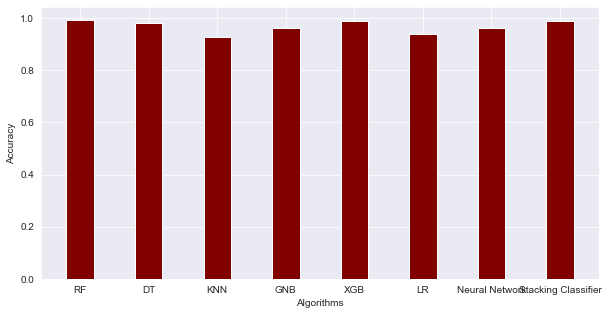

In [79]:
algorithms =['RF','DT','KNN','GNB','XGB','LR','Neural Network',"Stacking Classifier"]
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(algorithms,results, color ='maroon', width = 0.4)
 
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show()

['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'soiltype']
{'f0': 'N', 'f1': 'P', 'f2': 'K', 'f3': 'temperature', 'f4': 'humidity', 'f5': 'ph', 'f6': 'rainfall', 'f7': 'soiltype'}
['P', 'rainfall', 'N', 'ph', 'temperature', 'K', 'soiltype']
[361, 418, 324, 329, 270, 300, 264]


<AxesSubplot:>

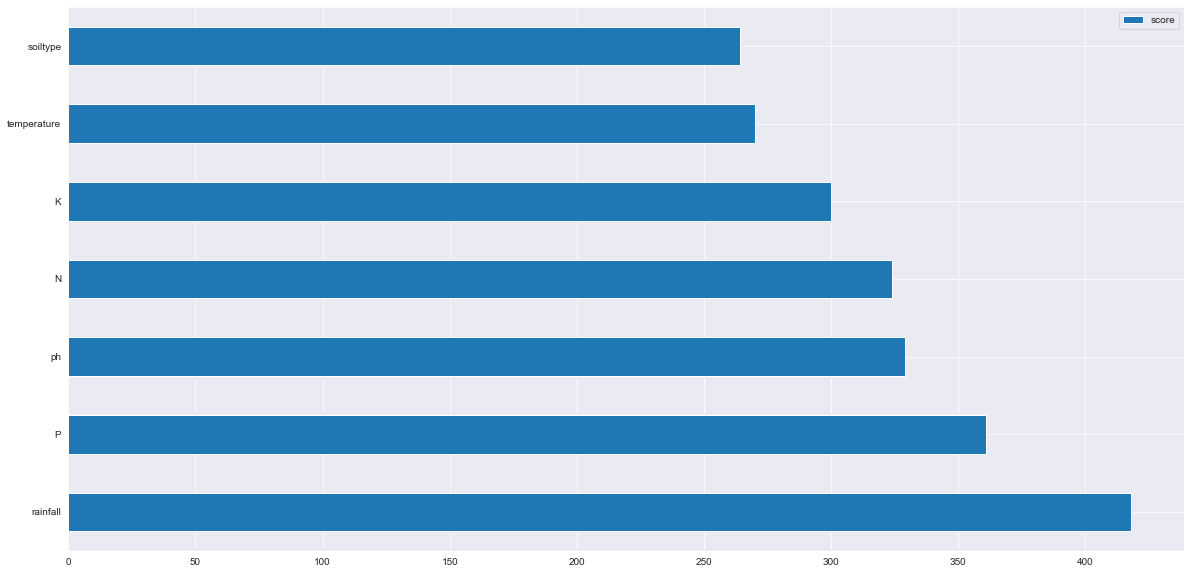

In [80]:
features_list = ["N","P","K","temperature","humidity","ph","rainfall","soiltype"]

features_dict=dict()

i=0
for feature in features_list:
    features_dict.update({'f'+str(i):feature})
    i=i+1
#====================================================================
feature_important = xgb.get_booster().get_score(importance_type='weight')
important_keys = list(feature_important.keys())
values = list(feature_important.values())

print(features_list)
print(features_dict)
print(important_keys)
print(values)


data = pd.DataFrame(data=values, index=important_keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(8, columns="score").plot(kind='barh', figsize = (20,10)) ## plot top 12 important features

In [81]:
import pickle
pickle.dump(rclf,open('randomforest_model_crop.pickle', 'wb'))

In [82]:
rf = pickle.load(open('randomforest_model_crop.pickle', 'rb'))
testrec=[X_test.iloc[i].values][0].tolist()
print(testrec)
result=rf.predict([testrec])
print(result)

[96.0, 41.0, 40.0, 23.58419277, 6.090060478, 190.4242157, 6.0]
[8]


In [83]:
print(list(crop_mapping.keys())[list(crop_mapping.values()).index(result[0])])

ValueError: 8 is not in list